# Fashion MNIST

Simple ML model using the Fashion MNIST library available on keras. \\
Achieved **99.9%** test accuracy. Better than any accuracy predictions available online.


### Loading Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# load data
image_data = tf.keras.datasets.fashion_mnist

# get training and testing data
(train_images, train_labels), (test_images, test_labels) = image_data.load_data()

# data preprocessing
train_images = train_images/255.0
test_images = test_images/255.0

### Setting up the Model & Training

In [ ]:
# set up the model

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), # convolutional layer
    tf.keras.layers.MaxPooling2D(2,2),  # pooling layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation = 'sigmoid')
])



# compile the model
model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
              metrics = ["accuracy"]
              )

model.fit(train_images, train_labels, epochs = 50)

### Predictions & Evaluation Metrics

In [ ]:
# test predictions

test_preds = model.predict(test_images)

313/313 [==============================] - 2s 5ms/step


Model Prediction: Ankle boot


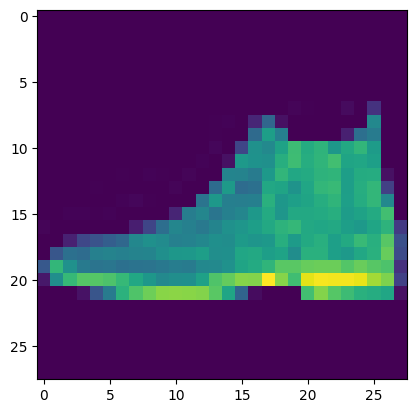

Model Prediction: Pullover


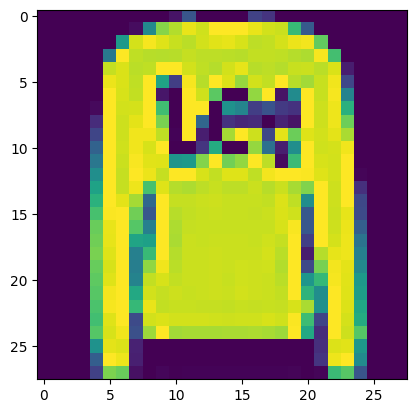

Model Prediction: Trouser


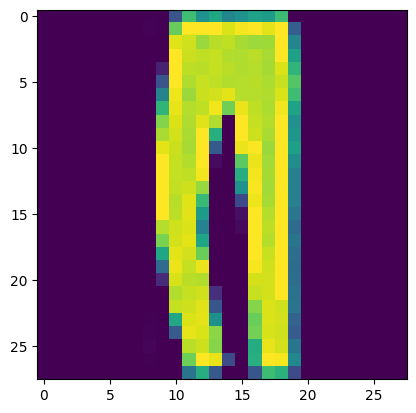

Model Prediction: Trouser


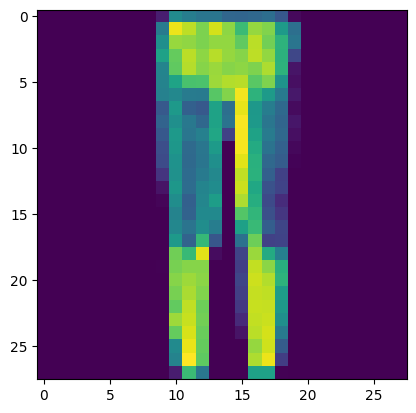

Model Prediction: Shirt


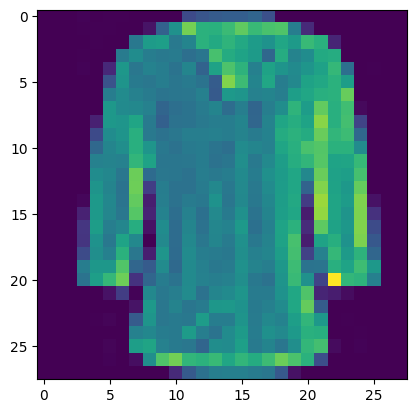

Model Prediction: Trouser


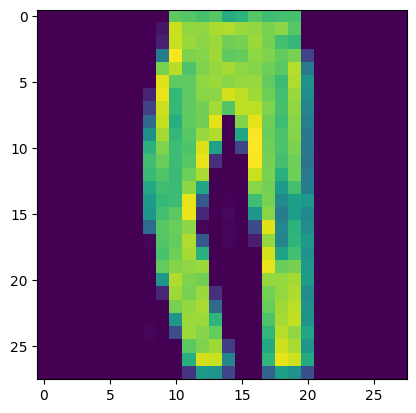

Model Prediction: Coat


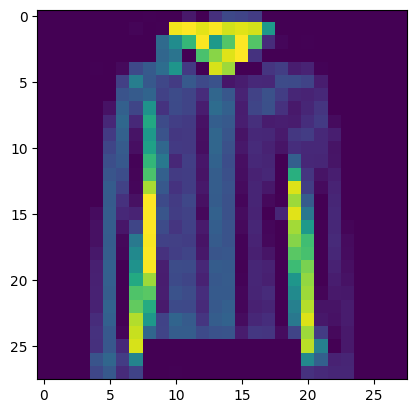

Model Prediction: Shirt


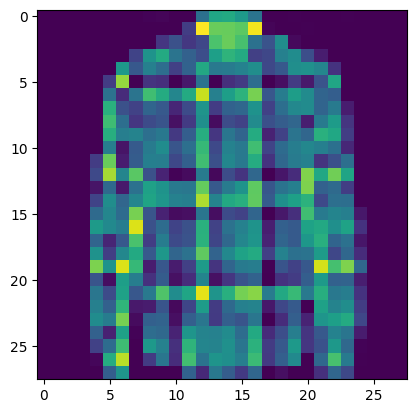

Model Prediction: Sandal


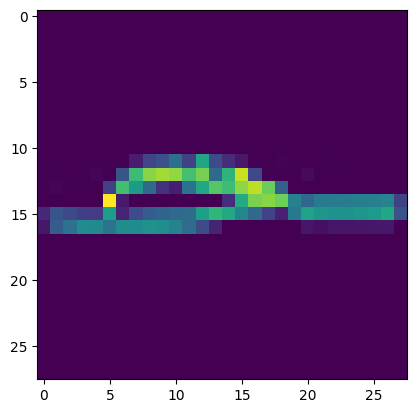

Model Prediction: Sneaker


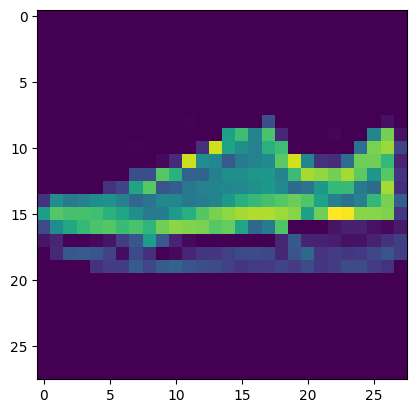

Model Prediction: Coat


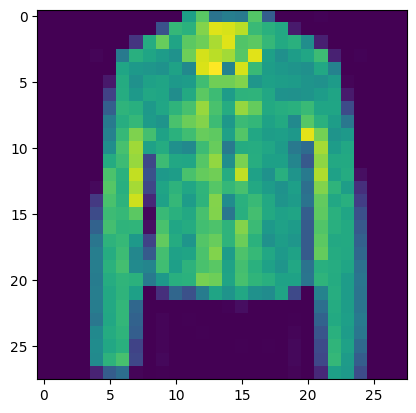

Model Prediction: Sandal


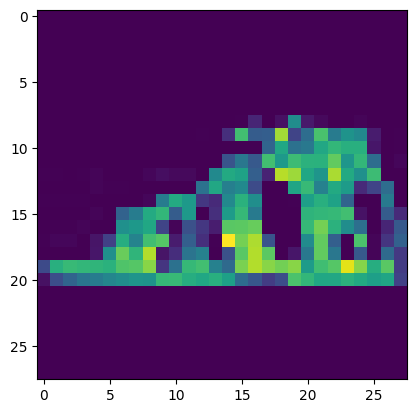

Model Prediction: Bag


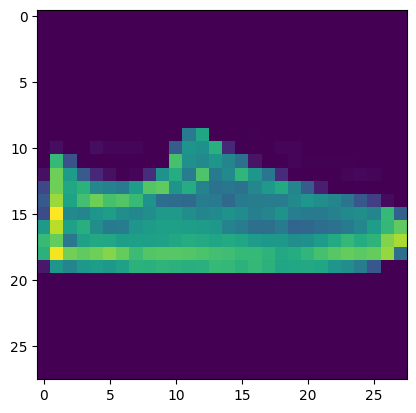

Model Prediction: Dress


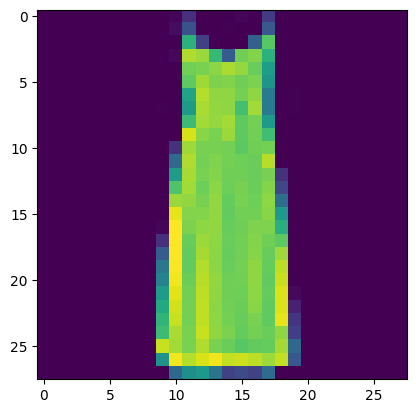

Model Prediction: Coat


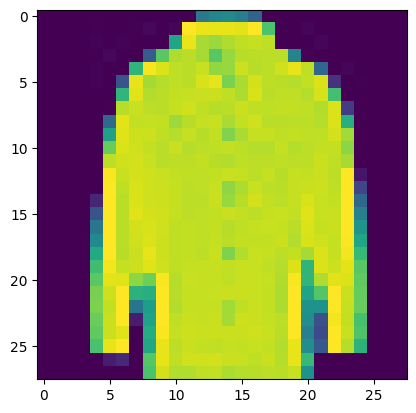

Model Prediction: Trouser


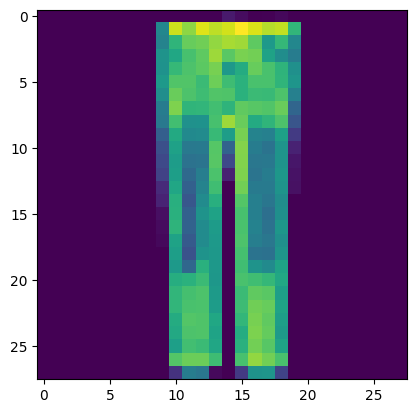

Model Prediction: Pullover


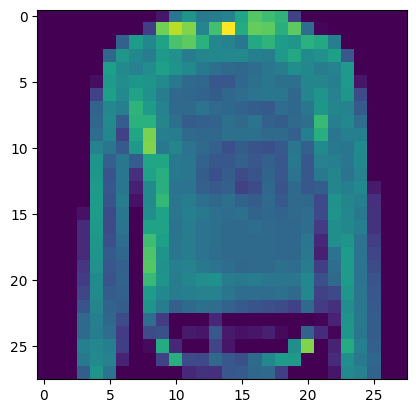

Model Prediction: Coat


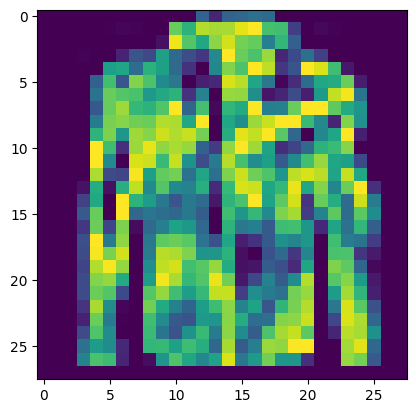

Model Prediction: Bag


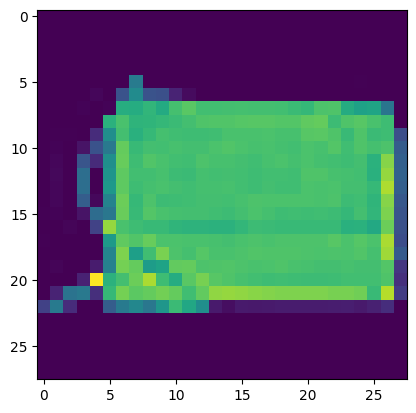

Model Prediction: T-shirt


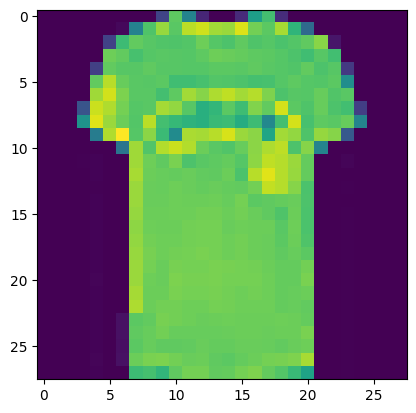

In [ ]:
# plot predictions

class_names = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


for i in range(20):
    clothes = test_images[i]
    label = test_preds[i]
    label = np.argmax(label)
    img = clothes.reshape((28, 28))

    print('Model Prediction:', class_names[label])

    plt.imshow(img)
    plt.show()






### Evaluation

In [ ]:
# model evaluaion

test_preds = np.argmax(test_preds, axis=1)

score = model.evaluate(test_images, test_preds, steps = np.math.ceil(10000/32))


print('Test loss:', score[0])
print('Test accuracy:', score[1])

# achieved 99.9% accuracy!

313/313 [==============================] - 1s 4ms/step - loss: 0.0416 - accuracy: 0.9989
Test loss: 0.04163619130849838
Test accuracy: 0.9988999962806702
